<a href="https://colab.research.google.com/github/g-roger/plataformas-cognitivas/blob/main/Plataformas_Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configurações

Imports de Pacotes

In [1]:
!pip install --upgrade azure-storage
from IPython.display import display, Javascript
from IPython.display import Image
from google.colab.output import eval_js
from base64 import b64decode
from azure.storage.blob import BlockBlobService

  Using cached azure-storage-0.37.0.zip (4.3 kB)


Funções úteis

In [2]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Informações do cliente

In [33]:
#@title Preencha aqui com as informações do cliente requisitante

#@markdown Informe todos os campos a seguir:
nome = "Groger" #@param {type:"string"}

renda =  4000#@param {type:"number"}
idade = 25 #@param {type:"slider", min:18, max:100, step:1}
etnia = "Etnia01"  #@param ["Selecionar etnia", "Etnia01", "Etnia02"]
genero = "Feminino" #@param ["Masculino", "Feminino"]
casa_propria = "Sim" #@param ["Selecionar", "Sim", "Não"]
outras_rendas = "Sim" #@param ["Selecionar", "Sim", "Não"]
estado_civil = "Estado01" #@param ["Selecionar", "Estado01", "Estado02"]
escolaridade = 0 #@param {type:"slider", min:0, max:3, step:1}

#@markdown ---


In [4]:
root_path = '/content'
dir_name = ''
account_name = 'storageestudo'
account_key = 'uWf96R4Jn9b4nGr4Qy0tfubua/iMM/81gMCMXUs4H3YQmoMuxDZ1XUE1dZHRCBRRw3VxahjqRtNUp160rtCZgw=='
container_name = 'images'

<IPython.core.display.Javascript object>

Saved to photo.jpg


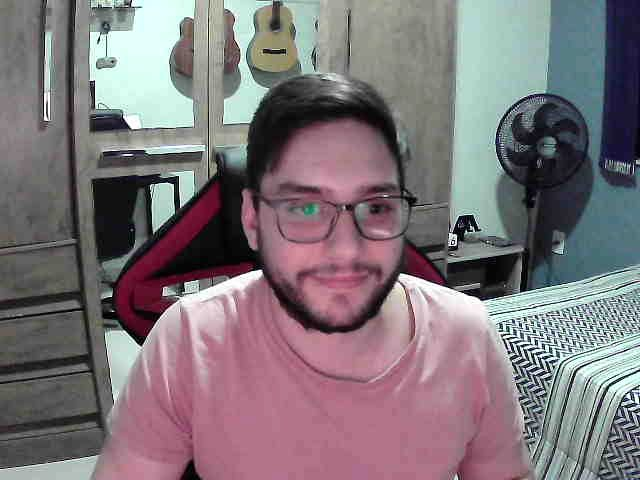

In [5]:
#@title Tire uma foto do cliente requerente (ou tire uma foto sua mesmo)
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  block_blob_service = BlockBlobService(
    account_name=account_name,
    account_key=account_key
  )

  path = f"{root_path}/{dir_name}"

  blob_name = f"{dir_name}/{filename}"
  file_path = f"{path}/{filename}"
  block_blob_service.create_blob_from_path(container_name, blob_name, file_path)
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Análise de crédito

1. Verifique se na imagem possui uma pessoa, utilizando a API "default" da IBM; Se não possuir, informar mensagem e não conceder o empréstimo.


2.  Verifique se a imagem apresenta conteúdo explícito , utilizando a API "explicit"da IBM; Se possuir, informar mensagem e não conceder o empréstimo.  


3. Verificar o gênero e a idade da pessoa utilizando a API de reconhecimento facial da Microsoft Azure; Se não for o mesmo gênero ou se a idade diferir em 5 anos (para mais ou para menos), informar mensagem e não conceder o empréstimo.


4. Exibir a imagem novamente no notebook com os pontos "fiduciais" da face da pessoa, obtidos pela API da Azure. (em uma aplicação corporativa, estes pontos ficam gravados para futuras autenticações)


5. Chamar a API de Machine Learning em um contêiner feito em Docker e que esteja rodando em uma máquina virtual no Google Cloud. Esta API deve usar os dados informados neste notebook e **automaticamente** vetar ou conceder o empréstimo.


ATENÇÃO PARA O BULLET 5: É necessário chamar tanto um modelo que possua a variável ETNIA quanto um modelo que não possui esta variável, assim como fizemos em aula!!!


6. Gravar um vídeo "operando" o notebook e simulando a avaliação com concessão ou reprovação do crédito.


7. Submeter o Notebook e o vídeo da plataforma da FIAP, se o vídeo ficar muito grande, submeter ao Youtube (pode ser privado) e anexar o Link.

---  
(Dica: Você pode usar este vídeo para divulgar seu trabalho como Engenheiro de ML)


## Exercicio 01

In [6]:
# Verifique se na imagem possui uma pessoa, utilizando a API "default" da IBM; 
# Se não possuir, informar mensagem e não conceder o empréstimo.

# Esta sendo usado a API da Azure pelo da IBM ser descontinuado.

In [7]:
!pip install azure-cognitiveservices-vision-face
!pip install Pillow

In [8]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from PIL import Image, ImageDraw
import json

In [9]:
# Chave API
KEY = "45d1d8d184e845198ba88db929d5bb29"
# Endpoint
ENDPOINT = "https://face-recog20ia.cognitiveservices.azure.com/"
# Autenticação
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))

In [10]:
imagefile = "./photo.jpg" 
with open(imagefile, 'r+b') as w:
    detected_faces = face_client.face.detect_with_stream(image=w)

img = Image.open(imagefile)
draw = ImageDraw.Draw(img)

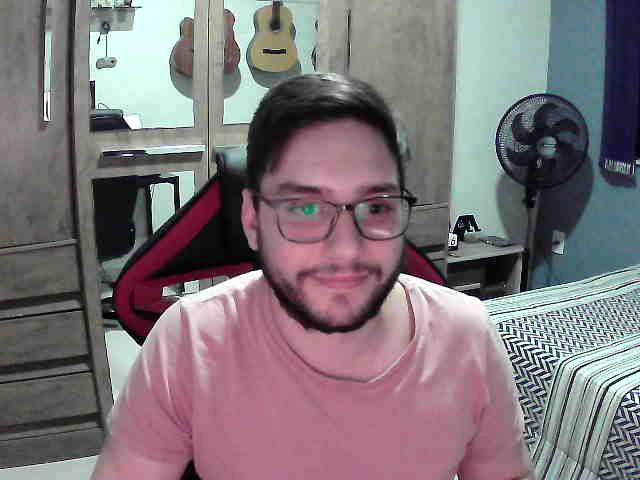

In [11]:
img

In [12]:
if bool(detected_faces) == False:
  print('Não foi detectado nenhuma face!')
else:
  print('Rosto Validado!')

Rosto Validado!


## Exercicio 02

In [ ]:
# Verifique se a imagem apresenta conteúdo explícito , utilizando a API "explicit"da IBM; 
# Se possuir, informar mensagem e não conceder o empréstimo.

# Esta sendo usado a API da Azure pelo da IBM ser descontinuado.

In [13]:
import requests
import json

In [19]:
imagem = 'https://' + account_name + '.blob.core.windows.net/images/photo.jpg'
#imagem = "http://s2.glbimg.com/5xNdRilf__4mhRisDKEBPsLuTyc=/320x0/s.glbimg.com/jo/eg/f/original/2016/03/02/mamonas.jpg"

headers = {'content-type':'application/json','Ocp-Apim-Subscription-Key':'6ff697031b2d414c9740fccebba5ef99'}
payload = {"DataRepresentation":"URL", "Value":imagem}
url = 'https://eastus2.api.cognitive.microsoft.com/contentmoderator/moderate/v1.0/ProcessImage/Evaluate'

In [20]:
response = requests.post(url,data=json.dumps(payload),headers=headers).json()
response

{'AdultClassificationScore': 0.012879312969744205,
 'AdvancedInfo': [{'Key': 'ImageDownloadTimeInMs', 'Value': '516'},
  {'Key': 'ImageSizeInBytes', 'Value': '32578'}],
 'IsImageAdultClassified': False,
 'IsImageRacyClassified': False,
 'RacyClassificationScore': 0.01666022348217666,
 'Result': False,
 'Status': {'Code': 3000, 'Description': 'OK', 'Exception': None},
 'TrackingId': 'ec77f208-1970-40ff-807f-e1b1244ad5e5'}

In [21]:
is_adult_score = response['AdultClassificationScore'] > 0.7
is_adult_content = response['IsImageAdultClassified'] > 0.7
is_racy = response['RacyClassificationScore'] > 0.7

In [22]:
if is_adult_score or is_adult_content or is_racy:
  print('Negado devido a conteúdo explícito!')
else:
  print('Validado!')

Validado!


## Exercicio 03

In [ ]:
# Verificar o gênero e a idade da pessoa utilizando a API de reconhecimento facial da Microsoft Azure; 
# Se não for o mesmo gênero ou se a idade diferir em 5 anos (para mais ou para menos), informar mensagem e não conceder o empréstimo.

In [23]:
!pip install azure-cognitiveservices-vision-face
!pip install Pillow

In [24]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from PIL import Image, ImageDraw
import json

In [25]:
def getRectangle(faceDictionary):
    """
    Função para criar um retângulo a partir de uma face identificada pelo Azure Face Detection
    :param faceDictionary:
    :return:
    """
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height

    return ((left, top), (right, bottom))

In [26]:
def drawCrossesOnFace(faceLandmarks, size=2, color='white'):
    fl = faceLandmarks.as_dict()
    for l in fl.keys():
        x = fl[l]['x']
        y = fl[l]['y']
        draw.line(((x - size, y - size), (x + size, y + size)), fill=color)
        draw.line(((x - size, y + size), (x + size, y - size)), fill=color)
    pass

### API Client

In [27]:
KEY = "45d1d8d184e845198ba88db929d5bb29" #Coloque aqui sua chave
ENDPOINT = "https://face-recog20ia.cognitiveservices.azure.com/" #Coloque aqui seu endpoint (Ponto de Extremidade)
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))

In [28]:
imagefile = "./photo.jpg" 
with open(imagefile, 'r+b') as w:
    detected_faces = face_client.face.detect_with_stream(image=w)

In [29]:
return_face_attributes = ["age", "gender"]
with open(imagefile, 'r+b') as w:
    detected_faces = face_client.face.detect_with_stream(image=w, return_face_landmarks = True, return_face_attributes = return_face_attributes)

In [30]:
img = Image.open(imagefile)
draw = ImageDraw.Draw(img)

for face in detected_faces:
    print("**** Face Detectada: [{0}] on : {1}".format(face.face_id, face.face_rectangle))
    #print("Landmarks: ")
    #print(json.dumps(face.face_landmarks.as_dict(), indent=4) )
    print("Atributes: ")
    print(json.dumps(face.face_attributes.as_dict(), indent=4) )
    draw.rectangle(getRectangle(face), outline='red')

    #Permitir leitura de apenas uma propiedade do JSON
    json_object = json.loads(json.dumps(face.face_attributes.as_dict()))
    
    #Tradução Genero 
    if json_object["gender"] == 'male':
      gender = 'Maculino'
    else:
      gender = 'Feminino'
    
    draw.text(xy=(face.face_rectangle.left,  face.face_rectangle.top + face.face_rectangle.height),
                      text = nome + ' - ' + gender + ' - ' + str(json_object["age"]),
                      fill='red')
    #drawCrossesOnFace(face.face_landmarks, size=2, color='white')

**** Face Detectada: [6394c66b-bbc7-4ccb-8d5e-f304a03a16ea] on : {'additional_properties': {}, 'width': 151, 'height': 151, 'left': 263, 'top': 165}
Atributes: 
{
    "age": 27.0,
    "gender": "male"
}


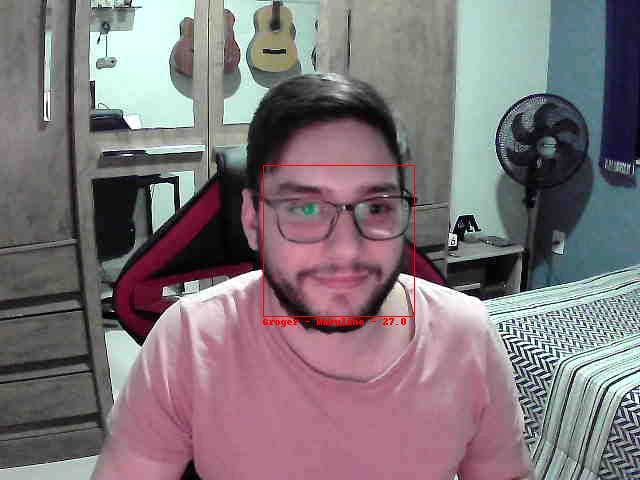

In [31]:
img

In [34]:
age = idade
age_api = json_object["age"]

if genero == 'Masculino':
  gender = 'male'
else:
  gender = 'female'

gender_api = json_object["gender"]

age_min = age_api-5
age_max = age_api+5

if age <= age_max and age >= age_min and gender==gender_api:
  print("Emprestimo concedido com sucesso!")
else:
  print("Perfil da foto não condiz com os dados preenchdidos, emprestimo negado!")

Perfil da foto não condiz com os dados preenchdidos, emprestimo negado!


## Exercicio 04

In [ ]:
# Exibir a imagem novamente no notebook com os pontos "fiduciais" da face da pessoa, obtidos pela API da Azure. 
# (em uma aplicação corporativa, estes pontos ficam gravados para futuras autenticações)

In [35]:
img_auth = Image.open(imagefile)
draw = ImageDraw.Draw(img_auth)
for face in detected_faces:
     drawCrossesOnFace(face.face_landmarks, size=2, color='white')

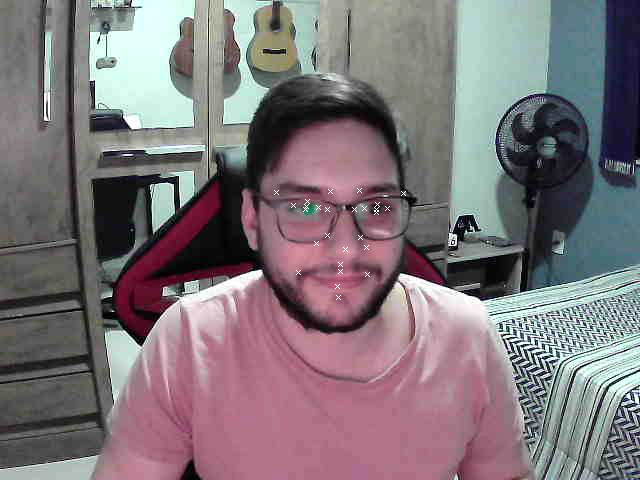

In [36]:
img_auth

## Exercicio 5

In [37]:
# Chamar a API de Machine Learning em um contêiner feito em Docker e que esteja rodando em uma máquina virtual no Google Cloud. 
# Esta API deve usar os dados informados neste notebook e automaticamente vetar ou conceder o empréstimo.

In [38]:
import requests
import pandas as pd
import numpy as np
import json

In [39]:
#@title Parâmetros da Solução

#@markdown IP do Servidor
my_server_ip = "34.125.20.35" #@param {type:"string"}

#@markdown Porta do Servidor
my_server_port = "443" #@param {type:"string"}

In [40]:
cliente = pd.DataFrame({'nome': [nome],
                   'renda': [renda],
                   'idade': [idade],
                   'etnia': 0 if [etnia]=='Etnia01' else 1,
                   'genero': 0 if [genero]=='Masculino' else 1,
                   'casa_propria ': 1 if [casa_propria]=='Sim' else 0,
                   'outras_rendas ': 1 if [outras_rendas]=='Sim' else 0,
                   'estado_civil ': 0 if [estado_civil]=='Estado01' else 1,
                   'escolaridade ': [escolaridade]})
cliente

,nome,renda,idade,etnia,genero,casa_propria,outras_rendas,estado_civil,escolaridade
0,Groger,4000,25,1,1,0,0,1,0


Predição Cliente

In [41]:
url = "http://{}:{}/predict".format(my_server_ip, my_server_port)
headers = {'Content-Type': 'application/json'}
conteudo = cliente.to_json()

In [42]:
response01 = requests.request("POST", url + "?model=modelo01", headers=headers, data=conteudo)
respostas01 = json.loads(response01.text.encode('utf8').decode())
respostas01

{'prediction': [0.6931241367770489]}

In [43]:
df_01 = pd.Series(respostas01['prediction'], index = cliente.index, name="PredicaoML01")

In [44]:
response02 = requests.request("POST", url + "?model=modelo02", headers=headers, data=conteudo)
respostas02 = json.loads(response02.text.encode('utf8').decode())
respostas02

{'prediction': [1], 'proba': [[0.08198867296643964, 0.9180113270335604]]}

In [45]:
df_02 = pd.Series(respostas02['prediction'], index = cliente.index, name="PredicaoML02")

In [46]:
score_model = pd.DataFrame(cliente.loc[:,"nome"])\
    .merge(right= df_01, left_index=True, right_index=True)\
    .merge(df_02, left_index=True, right_index=True)

score_model 

,nome,PredicaoML01,PredicaoML02
0,Groger,0.693124,1


In [47]:
score_model

,nome,PredicaoML01,PredicaoML02
0,Groger,0.693124,1


Resultado Emprestimo

In [48]:
if int(score_model['PredicaoML01']) > 0.7 and score_model['PredicaoML02'] == 1:
  print('Emprestimo concedido para o cliente: ', nome)
else:
  print('Emprestimo negado para o cliente: ', nome)

Emprestimo negado para o cliente:  Groger
